# Assessment Problems Notebook

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Setup

To start, we import NumPy for the simulation and use `comb` from the Python
standard library to calculate the analytical probabilities. Setting a random
seed ensures that the results are reproducible each time the notebook runs.

For reproducible simulations, NumPy’s random number generator follows the behaviour described in the official documentation: https://numpy.org/doc/stable/reference/random/

In [15]:
import numpy as np
from math import comb
import itertools
import random

### Experiment setup

We define the number of total cups and how many are tea-first vs. milk-first.  
For the extended version of the experiment, we have 12 cups in total: 8 tea-first and 4 milk-first.

We will store this information in simple variables so we can use them in both the analytical calculation and the simulation later.

In [16]:
# Experiment parameters for Problem 1

n_total = 12       # total cups
n_tea_first = 8    # number of tea-first cups
n_milk_first = 4   # number of milk-first cups

# Check that our counts match the total
assert n_tea_first + n_milk_first == n_total

### Analytical probability

Before running the simulation, it helps to calculate the exact probability of getting all 12 cups correct just by guessing.  
There are 12 cups in total, and the participant needs to correctly identify which 8 are tea-first.

The number of different ways to choose 8 cups out of 12 is given by the combination “12 choose 8”.  
Since only one of these possible arrangements is completely correct, the probability of getting every cup right by chance is:

    probability = 1 / (12 choose 8)

I calculate this value below using Python.

The comb function from the Python standard library calculates combinations (“n choose k”), as documented here: https://docs.python.org/3/library/math.html#math.comb

In [17]:
# Analytical probability for the 12-cup experiment
analytical_prob_12 = 1 / comb(n_total, n_tea_first)
analytical_prob_12

0.00202020202020202

### Simulation

The itertools.combinations function is used to list all ways to choose a subset of items: https://docs.python.org/3/library/itertools.html#itertools.combinations

Random selections from a list are made using Python’s random.choice: https://docs.python.org/3/library/random.html#random.choice

In [18]:
# Generate all possible ways to choose which cups are milk-first
all_combinations = list(itertools.combinations(range(n_total), n_milk_first))
print(f"Total number of possible combinations: {len(all_combinations)}")

# Randomly select one arrangement as the true one
true_combination = random.choice(all_combinations)
true_set = set(true_combination)
true_combination

Total number of possible combinations: 495


(4, 7, 8, 11)

In [19]:
# Set up and run simulation
n_trials = 100000
count_correct = 0

for i in range(n_trials):
    random_guess = random.choice(all_combinations)
    if set(random_guess) == true_set:
        count_correct += 1

simulated_prob_12 = count_correct / n_trials
simulated_prob_12

0.00199

In [20]:
# Compare results
analytical_prob_12, simulated_prob_12

(0.00202020202020202, 0.00199)

In [21]:
# The difference shows sampling error
difference = analytical_prob_12 - simulated_prob_12
difference

3.0202020202020185e-05

### Comparison with Original Experiment

In [22]:
# Original experiment: 8 cups, 4 tea-first, 4 milk-first
original_total = 8
original_tea_first = 4
original_combinations = comb(original_total, original_tea_first)
original_prob = 1 / original_combinations
original_prob

0.014285714285714285

In [23]:
# Compare the probabilities
print("Probability comparison:")
print("Original experiment (8 cups):", original_prob)
print("New experiment (12 cups):", analytical_prob_12)

Probability comparison:
Original experiment (8 cups): 0.014285714285714285
New experiment (12 cups): 0.00202020202020202


### Explanation of the simulation

To estimate the probability of correctly identifying all cups by chance, I simulated the experiment by repeatedly shuffling the labels on the 12 cups. In each trial, a random arrangement of the 4 milk-first cups was chosen. I compared this random guess to the true arrangement. If they matched exactly, it counted as a success.

Running this process many times (100,000 trials) gives an estimate of how often someone would get all cups right purely by guessing. This simulated probability can then be compared with the analytical value to confirm that both approaches agree.


### Interpretation and conclusion

The analytical probability of guessing all 12 cups correctly by chance is about 0.002. The simulation result is very close to this value, with only small differences due to randomness.

This probability is much lower than in the original 8-cup experiment (about 0.014). This means the extended 12-cup setup is a stricter test: it is even less likely that someone could succeed by luck. Because of this, there is no reason to relax the p-value threshold. If anything, the extended design gives stronger evidence against random guessing.

End of problem 1

---

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
Plot histograms of both sets of values on the same axes with transparency.
Describe the differences you see.
Explain how you expect these differences to change if the sample size is increased.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
n_samples = 100000
sample_size = 10
samples = np.random.normal(0, 1, (n_samples, sample_size))

### Checking the standard deviations

The numpy.std function calculates standard deviation, with the ddof parameter controlling whether we get sample or population standard deviation, as documented here: https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [26]:
population_sd = np.std(samples, axis=1, ddof=0)
sample_sd = np.std(samples, axis=1, ddof=1)

population_sd.shape, sample_sd.shape
population_sd[:5], sample_sd[:5]

(array([0.85738685, 0.8605998 , 1.14392128, 0.72593034, 0.42020979]),
 array([0.90376509, 0.90715184, 1.2057989 , 0.76519776, 0.44294001]))

In [27]:
np.mean(population_sd), np.mean(sample_sd)

(np.float64(0.9216917930050759), np.float64(0.9715484555268299))

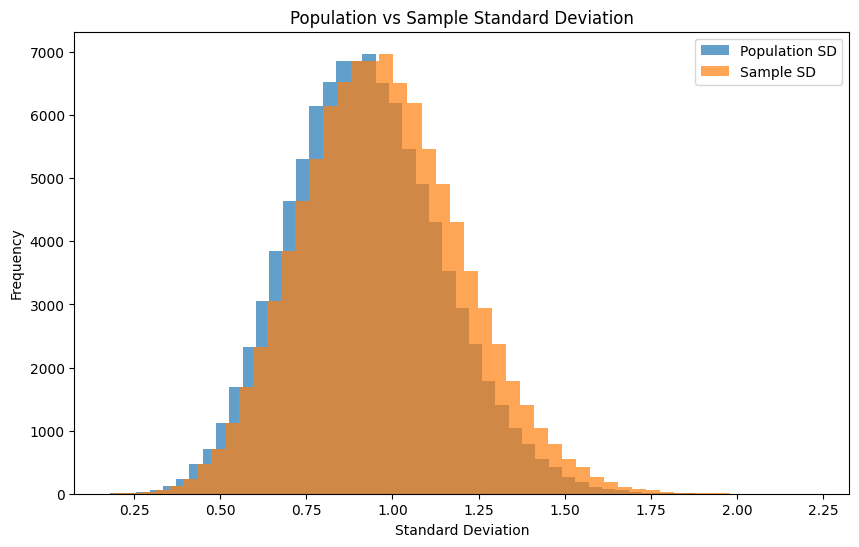

In [28]:
# Plot both SD types on same graph
plt.figure(figsize=(10, 6))
plt.hist(population_sd, bins=50, alpha=0.7, label='Population SD')
plt.hist(sample_sd, bins=50, alpha=0.7, label='Sample SD')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Population vs Sample Standard Deviation')
plt.legend()
plt.show()